In [922]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [923]:
warnings.filterwarnings('ignore')

# Approach to solve this problem

- EDA
- Univariate Analysis
- Multivariate Analysis
- Data Clean up if required
- Train-Test split
- Rescaling
- Fits transform
- Automated (RFE)
- Manual (p-value followed by vif) - to be done one by one 


In [924]:
bike = pd.read_csv("day.csv")

In [925]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [926]:
def weather_map(x):
    dictionary = {1:'Clear', 2:'Mist', 3:'LightSnow', 4:'HeavyRain'}
    return dictionary[x]

# Defining the season map function
def season_map(x):
    dictionary = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
    return dictionary[x]

import calendar
# Defining the day map function
day_dictionary = {}
for i in range(7):
    day_dictionary[i] = calendar.day_name[i-1]
    
def day_map(x):
    #global day_dictionary
    day_dictionary = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
    return day_dictionary[x]

#Defining month map function
month_dictionary = {}
for i in range(1, 13):
    month_dictionary[i] = calendar.month_name[i]

def month_map(x):
    #global month_dictionary
    #This is to take only first 3 characters for easy representation
    month_dictionary = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
    return month_dictionary[x]

def year_map(x):
    year_dictionary = {0: '2018', 1:'2019'}
    return year_dictionary[x]

indicators = ['season', 'mnth', 'weekday','weathersit']
maps = [season_map, month_map, day_map, weather_map]

In [927]:
# Applying the function to the housing list
'''
bike['weathersit'] = bike['weathersit'].apply(weather_map)
bike['season'] = bike['season'].apply(season_map)
bike['weekday'] = bike['weekday'].apply(day_map)
bike['mnth'] = bike['mnth'].apply(month_map)
bike['yr'] = bike['yr'].apply(year_map)
'''
for i in range(len(indicators)):
    bike[indicators[i]] = bike[indicators[i]].apply(maps[i])

In [928]:
#columns to be dropped
drop_columns = ['instant','dteday', 'casual','registered']
for i in drop_columns:
    bike.drop(i, axis=1, inplace=True)

bike = pd.get_dummies(data = bike, columns = indicators, dtype=int, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_spring         730 non-null    int64  
 9   season_summer         730 non-null    int64  
 10  season_winter         730 non-null    int64  
 11  mnth_Aug              730 non-null    int64  
 12  mnth_Dec              730 non-null    int64  
 13  mnth_Feb              730 non-null    int64  
 14  mnth_Jan              730 non-null    int64  
 15  mnth_July             7

In [929]:
bike.shape

(730, 30)

In [930]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [931]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    510 non-null    int64  
 1   holiday               510 non-null    int64  
 2   workingday            510 non-null    int64  
 3   temp                  510 non-null    float64
 4   atemp                 510 non-null    float64
 5   hum                   510 non-null    float64
 6   windspeed             510 non-null    float64
 7   cnt                   510 non-null    int64  
 8   season_spring         510 non-null    int64  
 9   season_summer         510 non-null    int64  
 10  season_winter         510 non-null    int64  
 11  mnth_Aug              510 non-null    int64  
 12  mnth_Dec              510 non-null    int64  
 13  mnth_Feb              510 non-null    int64  
 14  mnth_Jan              510 non-null    int64  
 15  mnth_July             510 

In [932]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    220 non-null    int64  
 1   holiday               220 non-null    int64  
 2   workingday            220 non-null    int64  
 3   temp                  220 non-null    float64
 4   atemp                 220 non-null    float64
 5   hum                   220 non-null    float64
 6   windspeed             220 non-null    float64
 7   cnt                   220 non-null    int64  
 8   season_spring         220 non-null    int64  
 9   season_summer         220 non-null    int64  
 10  season_winter         220 non-null    int64  
 11  mnth_Aug              220 non-null    int64  
 12  mnth_Dec              220 non-null    int64  
 13  mnth_Feb              220 non-null    int64  
 14  mnth_Jan              220 non-null    int64  
 15  mnth_July             220 

In [933]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

In [934]:
#To get the numeric columns
float_columns = bike.select_dtypes(include=float)
int_columns = bike.select_dtypes(include=int)

numeric_columns = list(float_columns.columns) + list(int_columns.columns)

categorial_variables_in_numeric_columns = []
for i in numeric_columns:
    x = bike[i].nunique()
    if x == 2:
        x_set = set(bike[i].tolist())
        if 0 in x_set and 1 in x_set:
            categorial_variables_in_numeric_columns.append(i)

for i in categorial_variables_in_numeric_columns:
    numeric_columns.remove(i)

numeric_columns

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

### Rescaling numeric columns features

In [935]:
from sklearn.preprocessing import MinMaxScaler

In [936]:
scaler = MinMaxScaler()

In [937]:
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

In [938]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [939]:
y_train = df_train.pop('cnt')
X_train = df_train

In [940]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [941]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [942]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [943]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_July', 'mnth_Sep', 'weekday_Sat', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

In [944]:
X_train_rfe = X_train[col]

In [945]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculate_vif(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#Modelling is kept as a seperate method so that it can be used again and again based on vif 

import statsmodels.api as sm
def modelling(X_train_rfe):
    X_train_rfe_lm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_rfe_lm).fit()
    return X_train_rfe_lm, X_train_rfe, lm

In [946]:
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_July,mnth_Sep,weekday_Sat,weathersit_LightSnow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,1


In [947]:
X_train_rfe_lm, X_train_rfe, lm = modelling(X_train_rfe)

In [948]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        21:35:36   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2519      0.036      6.969      0.000       0.181       0.323
yr                       0.2305      0.008     28.795      0.000       0.215       0.246
holiday                 -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday               0.0433      0.012      3.762      0.000       0.021       0.066
temp                     0.5096      0.034     14.837      0.000       0.442       0.577
hum                     -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed               -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer            0.0508      0.015      3.423      0.001       0.022       0.080
season_winter            0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_July               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                 0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Sat              0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_LightSnow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist         -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [949]:
vif = calculate_vif(X_train_rfe)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Mist,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [950]:
X_train_rfe_m1 = X_train_rfe.drop(["hum"], axis = 1)
X_train_rfe_m1_lm, X_train_rfe_m1, lm = modelling(X_train_rfe_m1)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.60e-188
Time:                        21:35:36   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1737      0.031      5.520      0.000       0.112       0.235
yr                       0.2345      0.008     29.009      0.000       0.219       0.250
holiday                 -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday               0.0464      0.012      3.966      0.000       0.023       0.069
temp                     0.4722      0.034     14.005      0.000       0.406       0.538
windspeed               -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer            0.0445      0.015      2.967      0.003       0.015       0.074
season_winter            0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_July               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                 0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Sat              0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_LightSnow    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist         -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [951]:
vif = calculate_vif(X_train_rfe_m1)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,yr,2.08
7,season_winter,1.98
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_July,1.59


In [952]:
X_train_rfe_m2 = X_train_rfe_m1.drop(["holiday"], axis = 1)
X_train_rfe_m2_lm, X_train_rfe_m2, lm = modelling(X_train_rfe_m2)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          8.68e-189
Time:                        21:35:36   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1657      0.031      5.292      0.000       0.104       0.227
yr                       0.2346      0.008     28.941      0.000       0.219       0.251
workingday               0.0546      0.011      4.967      0.000       0.033       0.076
temp                     0.4724      0.034     13.966      0.000       0.406       0.539
windspeed               -0.1572      0.025     -6.306      0.000      -0.206      -0.108
season_spring           -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer            0.0448      0.015      2.980      0.003       0.015       0.074
season_winter            0.0775      0.017      4.499      0.000       0.044       0.111
mnth_Jan                -0.0398      0.018     -2.252      0.025      -0.074      -0.005
mnth_July               -0.0468      0.018     -2.549      0.011      -0.083      -0.011
mnth_Sep                 0.0736      0.017      4.406      0.000       0.041       0.106
weekday_Sat              0.0667      0.014      4.710      0.000       0.039       0.094
weathersit_LightSnow    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
weathersit_Mist         -0.0807      0.009     -9.351      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [953]:
vif = calculate_vif(X_train_rfe_m2)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.33
0,yr,2.08
6,season_winter,1.91
10,weekday_Sat,1.84
7,mnth_Jan,1.62
8,mnth_July,1.59


In [954]:
X_train_rfe_m3 = X_train_rfe_m2.drop(["mnth_Jan"], axis = 1)
X_train_rfe_m3_lm, X_train_rfe_m3, lm = modelling(X_train_rfe_m3)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          7.12e-189
Time:                        21:35:36   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1492      0.031      4.881      0.000       0.089       0.209
yr                       0.2339      0.008     28.756      0.000       0.218       0.250
workingday               0.0545      0.011      4.938      0.000       0.033       0.076
temp                     0.4920      0.033     14.991      0.000       0.427       0.556
windspeed               -0.1499      0.025     -6.040      0.000      -0.199      -0.101
season_spring           -0.0664      0.021     -3.182      0.002      -0.107      -0.025
season_summer            0.0481      0.015      3.196      0.001       0.019       0.078
season_winter            0.0838      0.017      4.910      0.000       0.050       0.117
mnth_July               -0.0486      0.018     -2.637      0.009      -0.085      -0.012
mnth_Sep                 0.0740      0.017      4.414      0.000       0.041       0.107
weekday_Sat              0.0664      0.014      4.671      0.000       0.038       0.094
weathersit_LightSnow    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
weathersit_Mist         -0.0817      0.009     -9.428      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [955]:
vif = calculate_vif(X_train_rfe_m3)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.32
0,yr,2.07
6,season_winter,1.91
9,weekday_Sat,1.83
7,mnth_July,1.58
11,weathersit_Mist,1.57


In [956]:
X_train_rfe_m4 = X_train_rfe_m3.drop(["mnth_July"], axis = 1)
X_train_rfe_m4_lm, X_train_rfe_m4, lm = modelling(X_train_rfe_m4)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.42e-188
Time:                        21:35:36   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1406      0.031      4.597      0.000       0.080       0.201
yr                       0.2344      0.008     28.655      0.000       0.218       0.250
workingday               0.0555      0.011      4.996      0.000       0.034       0.077
temp                     0.4796      0.033     14.678      0.000       0.415       0.544
windspeed               -0.1500      0.025     -6.007      0.000      -0.199      -0.101
season_spring           -0.0554      0.021     -2.692      0.007      -0.096      -0.015
season_summer            0.0626      0.014      4.447      0.000       0.035       0.090
season_winter            0.0958      0.017      5.788      0.000       0.063       0.128
mnth_Sep                 0.0873      0.016      5.423      0.000       0.056       0.119
weekday_Sat              0.0667      0.014      4.665      0.000       0.039       0.095
weathersit_LightSnow    -0.2893      0.025    -11.765      0.000      -0.338      -0.241
weathersit_Mist         -0.0804      0.009     -9.241      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [957]:
vif = calculate_vif(X_train_rfe_m4)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.30
0,yr,2.07
5,season_summer,2.00
8,weekday_Sat,1.83
6,season_winter,1.76
10,weathersit_Mist,1.57
7,mnth_Sep,1.23


In [958]:
X_train_rfe_m5 = X_train_rfe_m4.drop(["season_spring"], axis = 1)
X_train_rfe_m5_lm, X_train_rfe_m5, lm = modelling(X_train_rfe_m5)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          3.13e-188
Time:                        21:35:36   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0750      0.019      4.031      0.000       0.038       0.112
yr                       0.2331      0.008     28.370      0.000       0.217       0.249
workingday               0.0561      0.011      5.024      0.000       0.034       0.078
temp                     0.5499      0.020     27.861      0.000       0.511       0.589
windspeed               -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_summer            0.0886      0.010      8.608      0.000       0.068       0.109
season_winter            0.1307      0.010     12.600      0.000       0.110       0.151
mnth_Sep                 0.0974      0.016      6.184      0.000       0.066       0.128
weekday_Sat              0.0675      0.014      4.693      0.000       0.039       0.096
weathersit_LightSnow    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
weathersit_Mist         -0.0800      0.009     -9.143      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [959]:
vif = calculate_vif(X_train_rfe_m5)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_Sat,1.69
4,season_summer,1.57
9,weathersit_Mist,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
8,weathersit_LightSnow,1.08


In [960]:
lm.params

const                   0.075009
yr                      0.233139
workingday              0.056117
temp                    0.549892
windspeed              -0.155203
season_summer           0.088621
season_winter           0.130655
mnth_Sep                0.097365
weekday_Sat             0.067500
weathersit_LightSnow   -0.287090
weathersit_Mist        -0.080022
dtype: float64

                            yr  workingday      temp  windspeed  \
yr                    1.000000    0.031808  0.108054  -0.000439   
workingday            0.031808    1.000000  0.068326  -0.042704   
temp                  0.108054    0.068326  1.000000  -0.187281   
windspeed            -0.000439   -0.042704 -0.187281   1.000000   
season_summer         0.018294    0.046302  0.126057   0.110441   
season_winter        -0.027174   -0.060593 -0.234200  -0.090740   
mnth_Sep              0.002574    0.019495  0.207212  -0.121930   
weekday_Sat          -0.033817   -0.619074 -0.042608   0.049063   
weathersit_LightSnow -0.060764    0.021159 -0.036227   0.086778   
weathersit_Mist      -0.011388    0.043563 -0.089452  -0.029892   

                      season_summer  season_winter  mnth_Sep  weekday_Sat  \
yr                         0.018294      -0.027174  0.002574    -0.033817   
workingday                 0.046302      -0.060593  0.019495    -0.619074   
temp                       0.12

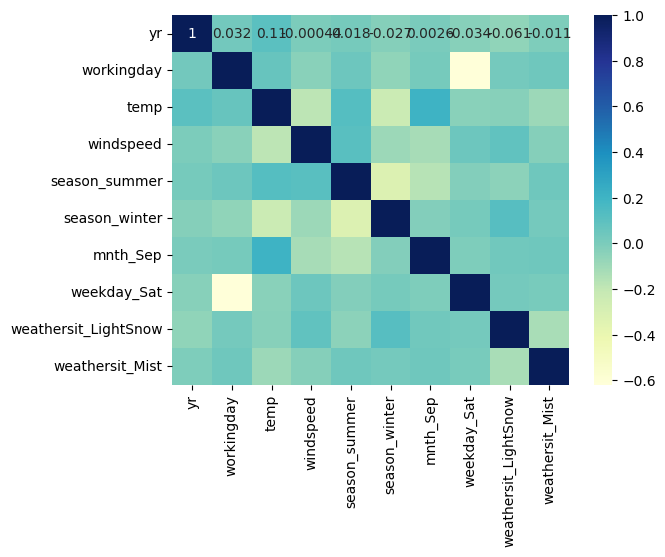

In [961]:
import matplotlib.pyplot as mp
print(X_train_rfe_m5.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(X_train_rfe_m5.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [962]:
X_train_rfe_m5.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Sep', 'weekday_Sat', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

In [963]:
y_pred_train = lm.predict(X_train_rfe_m5_lm)

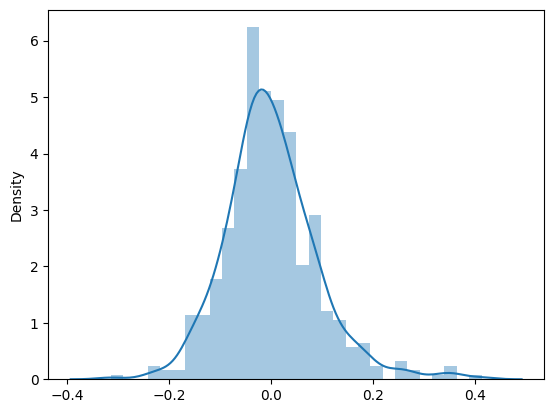

In [964]:
res = y_pred_train - y_train
sns.distplot(res)
plt.show()

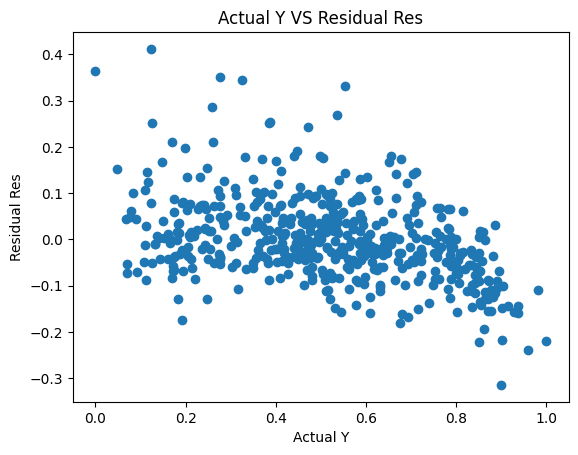

In [965]:
scatterPlot = plt.scatter(x = y_train, y = res)
plt.title('Actual Y VS Residual Res')
plt.xlabel('Actual Y')
plt.ylabel('Residual Res')
plt.show()

In [966]:
numeric_columns

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [967]:
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [968]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [969]:
y_test = df_test.pop('cnt')
X_test = df_test[X_train_rfe_m5.columns]

In [970]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_Sep,weekday_Sat,weathersit_LightSnow,weathersit_Mist
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1,0.519232,0.283397,0,1,0,0,0,0
127,1.0,0,0,0.584649,0.069510,1,0,0,0,0,0
640,1.0,1,1,0.745598,0.052115,0,1,0,0,0,1
72,1.0,0,1,0.331557,0.203418,0,0,0,0,0,0


In [971]:
y_test_pred = lm.predict(X_test_sm)

In [972]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7961390438459764

In [973]:
lm.params

const                   0.075009
yr                      0.233139
workingday              0.056117
temp                    0.549892
windspeed              -0.155203
season_summer           0.088621
season_winter           0.130655
mnth_Sep                0.097365
weekday_Sat             0.067500
weathersit_LightSnow   -0.287090
weathersit_Mist        -0.080022
dtype: float64

In [974]:
type(lm.params)

pandas.core.series.Series

In [975]:
params = lm.params

In [976]:
for i in parameters:
    print(i)

const
yr
workingday
temp
windspeed
season_spring
season_summer
season_winter
mnth_Sep
weekday_Sat
weathersit_LightSnow
weathersit_Mist


In [977]:
Equation_Formation = 'y = '

In [978]:
for i in params.index:
    Equation_Formation = Equation_Formation + " (" + "{:.4f}".format(params[i]) + ") x " + i + " +"

In [979]:
Equation_Formation = Equation_Formation[:len(Equation_Formation) - 2]

In [980]:
Equation_Formation

'y =  (0.0750) x const + (0.2331) x yr + (0.0561) x workingday + (0.5499) x temp + (-0.1552) x windspeed + (0.0886) x season_summer + (0.1307) x season_winter + (0.0974) x mnth_Sep + (0.0675) x weekday_Sat + (-0.2871) x weathersit_LightSnow + (-0.0800) x weathersit_Mist'